#  Car Evaluation Data Set

In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import ensemble
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

## Data preparation and preprocessing

In [2]:
column_names = ['buying', 'maint', 'doors', 'persons', 
                'lug_boot', 'safety', 'acceptability']
car_df = pd.read_csv('car.data', names=column_names, 
             sep=',', na_values='?', skipinitialspace=True)

Let's have a look at the categorical data (all of the data) to see if we have any missing values:

In [3]:
car_df.isna().sum()

buying           0
maint            0
doors            0
persons          0
lug_boot         0
safety           0
acceptability    0
dtype: int64

Now I'll use one-hot encoding to transform the categorical features into numerical ones:

In [4]:
X_df = car_df.drop("acceptability", axis=1, inplace=False) # Make DataFrame object without labels
X_df = pd.get_dummies(X_df, columns=['buying', 'maint', 'doors',
                                     'persons', 'lug_boot', 'safety']) # (1728, 21)
print (X_df.shape)

(1728, 21)


Now, let's split into X and Y. I'll use binary classification, so unacc=-1 and the rest is +1.

In [5]:
X = X_df.values

#Map acceptability to -1 and 1
car_df['acceptability'] = car_df['acceptability'].map({ 'unacc': -1, 'acc': 1, 'good': 1, 'vgood': 1  })
Y = car_df.values[:,-1] # (1728, )
Y = Y.astype('int')

Let's check how many positives we have (for display purposes).

In [12]:
pos_count = len(list(filter(lambda x: (x >= 0), Y)))
print(pos_count)
print(pos_count/len(Y))

518
0.29976851851851855


## Main algorithm

In [6]:
partitions=[0.2, 0.8]
C_list = [0.1, 1, 10, 100, 1000]
k_list = [1, 2, 3, 4, 5, 6, 7, 8, 9]
n_estimators = [25, 50, 100]
max_depth = [1, 5, 10]
svm_accuracy=[]
knn_accuracy=[]
random_forest_accuracy=[]

for p in partitions:
    for t in range (3):
        print('-----------------------------------')
        print('\nPartition (% training): ' + str(p*100))
        print('Trial number '+ str(t+1)+'/3')
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=p, random_state=t+1)

        #Linear SVM
        print('\nLinear SVM')
        
        # Cross validate
        estimator = svm.LinearSVC(penalty='l2', loss='hinge', random_state=1024)
        param_grid = {'C': C_list}
        grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=10)
        grid_search.fit(X_train, Y_train)
        svm_cross_val_results = grid_search.cv_results_
        
        # Train using best hyperperamater(s)
        C = grid_search.best_params_['C']
        classifier = svm.LinearSVC(penalty='l2', loss='hinge', C=C, random_state=1024)
        classifier.fit(X_train, Y_train)
        Y_train_pred = classifier.predict(X_train)
        Y_test_pred = classifier.predict(X_test)
        
        svm_accuracy.append(accuracy_score(Y_train, Y_train_pred))
        svm_accuracy.append(accuracy_score(Y_test, Y_test_pred))
        
        print('Best parameter, C: '+ str(C))
        print(svm_accuracy)
        
        #k-NN
        print('\nk-NN')
        
        # Cross validate
        estimator = neighbors.KNeighborsClassifier()
        param_grid = {'n_neighbors': k_list}
        grid_search = GridSearchCV(estimator, param_grid, cv=5)
        grid_search.fit(X_train, Y_train)
        knn_cross_val_results = grid_search.cv_results_
        
        # Train using best hyperperamater(s)
        k = grid_search.best_params_['n_neighbors']
        classifier = neighbors.KNeighborsClassifier(n_neighbors=k)
        classifier.fit(X_train, Y_train)
        Y_train_pred = classifier.predict(X_train)
        Y_test_pred = classifier.predict(X_test)
        
        knn_accuracy.append(accuracy_score(Y_train, Y_train_pred))
        knn_accuracy.append(accuracy_score(Y_test, Y_test_pred))
        
        print('Best parameter, k: '+str(k))
        print(knn_accuracy)
        
        #Random forest
        print('\nRandom forest')
        
        # Cross validate
        estimator = ensemble.RandomForestClassifier(random_state=1024)
        param_grid = {'n_estimators': n_estimators, 'max_depth': max_depth}
        grid_search = GridSearchCV(estimator, param_grid, cv=5)
        grid_search.fit(X_train, Y_train)
        forest_cross_val_results = grid_search.cv_results_
        
        # Train using best hyperperamater(s)
        n = grid_search.best_params_['n_estimators']
        d = grid_search.best_params_['max_depth']
        classifier = ensemble.RandomForestClassifier(n_estimators=n, max_depth=d, random_state=1024)
        classifier.fit(X_train, Y_train)
        
        # Obtain the training and testing accuracy
        Y_train_pred = classifier.predict(X_train)
        Y_test_pred = classifier.predict(X_test)
        
        random_forest_accuracy.append(accuracy_score(Y_train, Y_train_pred))
        random_forest_accuracy.append(accuracy_score(Y_test, Y_test_pred))
        print('Best parameter, n_estimators: '+str(n))
        print('Best parameter, max_depth: '+str(d))
        print(random_forest_accuracy)
        
        

-----------------------------------

Partition (% training): 20.0
Trial number 1/3

Linear SVM
Best parameter, C: 100
[0.9710144927536232, 0.9587852494577006]

k-NN


/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: L

Best parameter, k: 9
[0.9420289855072463, 0.8734634851771511]

Random forest
Best parameter, n_estimators: 100
Best parameter, max_depth: 10
[1.0, 0.958062183658713]
-----------------------------------

Partition (% training): 20.0
Trial number 2/3

Linear SVM
Best parameter, C: 1
[0.9710144927536232, 0.9587852494577006, 0.9652173913043478, 0.935647143890094]

k-NN


/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: L

Best parameter, k: 9
[0.9420289855072463, 0.8734634851771511, 0.927536231884058, 0.8756326825741142]

Random forest
Best parameter, n_estimators: 25
Best parameter, max_depth: 10
[1.0, 0.958062183658713, 1.0, 0.9276934201012292]
-----------------------------------

Partition (% training): 20.0
Trial number 3/3

Linear SVM
Best parameter, C: 1
[0.9710144927536232, 0.9587852494577006, 0.9652173913043478, 0.935647143890094, 0.9594202898550724, 0.9522776572668112]

k-NN


/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: L

Best parameter, k: 9
[0.9420289855072463, 0.8734634851771511, 0.927536231884058, 0.8756326825741142, 0.9217391304347826, 0.9052783803326103]

Random forest
Best parameter, n_estimators: 25
Best parameter, max_depth: 10
[1.0, 0.958062183658713, 1.0, 0.9276934201012292, 1.0, 0.9450469992769343]
-----------------------------------

Partition (% training): 80.0
Trial number 1/3

Linear SVM


/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: L

Best parameter, C: 1
[0.9710144927536232, 0.9587852494577006, 0.9652173913043478, 0.935647143890094, 0.9594202898550724, 0.9522776572668112, 0.9616497829232996, 0.9508670520231214]

k-NN
Best parameter, k: 9
[0.9420289855072463, 0.8734634851771511, 0.927536231884058, 0.8756326825741142, 0.9217391304347826, 0.9052783803326103, 0.9826338639652678, 0.9624277456647399]

Random forest
Best parameter, n_estimators: 50
Best parameter, max_depth: 10
[1.0, 0.958062183658713, 1.0, 0.9276934201012292, 1.0, 0.9450469992769343, 1.0, 0.9653179190751445]
-----------------------------------

Partition (% training): 80.0
Trial number 2/3

Linear SVM


/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: L

Best parameter, C: 1
[0.9710144927536232, 0.9587852494577006, 0.9652173913043478, 0.935647143890094, 0.9594202898550724, 0.9522776572668112, 0.9616497829232996, 0.9508670520231214, 0.9565846599131693, 0.9595375722543352]

k-NN
Best parameter, k: 9
[0.9420289855072463, 0.8734634851771511, 0.927536231884058, 0.8756326825741142, 0.9217391304347826, 0.9052783803326103, 0.9826338639652678, 0.9624277456647399, 0.9876989869753979, 0.9710982658959537]

Random forest
Best parameter, n_estimators: 50
Best parameter, max_depth: 10
[1.0, 0.958062183658713, 1.0, 0.9276934201012292, 1.0, 0.9450469992769343, 1.0, 0.9653179190751445, 1.0, 0.9797687861271677]
-----------------------------------

Partition (% training): 80.0
Trial number 3/3

Linear SVM


/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/tomash.spangelo/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: L

Best parameter, C: 1
[0.9710144927536232, 0.9587852494577006, 0.9652173913043478, 0.935647143890094, 0.9594202898550724, 0.9522776572668112, 0.9616497829232996, 0.9508670520231214, 0.9565846599131693, 0.9595375722543352, 0.9609261939218524, 0.9421965317919075]

k-NN
Best parameter, k: 9
[0.9420289855072463, 0.8734634851771511, 0.927536231884058, 0.8756326825741142, 0.9217391304347826, 0.9052783803326103, 0.9826338639652678, 0.9624277456647399, 0.9876989869753979, 0.9710982658959537, 0.9848046309696092, 0.9624277456647399]

Random forest
Best parameter, n_estimators: 50
Best parameter, max_depth: 10
[1.0, 0.958062183658713, 1.0, 0.9276934201012292, 1.0, 0.9450469992769343, 1.0, 0.9653179190751445, 1.0, 0.9797687861271677, 1.0, 0.9739884393063584]


### Averaged accuracy
Here I will find the averaged training and testing accuracy with standard deviation for each classifier out of the three trials in each partition.

In [7]:
# Function takes in the list of all accuracies and computes average accordingly + standard deviation
# Format of input: [(Partition1/Trial1/Training), (Partition1/Trial1/Testing), ...,
#                   (Partition2/Trial3/Training), (Partition2/Trial3/Testing)]
def averaged_accuracy(l):
    avg_train_20_l=[]
    avg_test_20_l=[]
    avg_train_80_l=[]
    avg_test_80_l=[]
    for i in range(len(l)):
        if i<6:
            if i%2==0:
                avg_train_20_l.append(l[i])
            else:
                avg_test_20_l.append(l[i])
        else:
            if i%2==0:
                avg_train_80_l.append(l[i])
            else:
                avg_test_80_l.append(l[i])

    avg_train_20 = sum(avg_train_20_l)/3
    avg_train_20_std = np.std(avg_train_20_l)
    avg_test_20 = sum(avg_test_20_l)/3
    avg_test_20_std = np.std(avg_test_20_l)
    avg_train_80 = sum(avg_train_80_l)/3
    avg_train_80_std = np.std(avg_train_80_l)
    avg_test_80 = sum(avg_test_80_l)/3
    avg_test_80_std = np.std(avg_test_80_l)
    return [(avg_train_20, avg_test_20, avg_train_20_std, avg_test_20_std),
            (avg_train_80, avg_test_80, avg_train_80_std, avg_test_80_std )]
    

In [8]:
#SVM
svm_avg_acc = averaged_accuracy(svm_accuracy)
print('SVM')
print('Average accuracy training 20/80: {} +/- {}'.format(svm_avg_acc[0][0], 
                                                          svm_avg_acc[0][2]))
print('Average accuracy testing 20/80: {} +/- {}'.format(svm_avg_acc[0][1],
                                                         svm_avg_acc[0][3]))
print('Average accuracy training 80/20: {} +/- {}'.format(svm_avg_acc[1][0],
                                                          svm_avg_acc[1][2]))
print('Average accuracy testing 80/20: {} +/- {}'.format(svm_avg_acc[1][1],
                                                         svm_avg_acc[1][3]))

#k-NN
knn_avg_acc = averaged_accuracy(knn_accuracy)
print('\nk-NN')
print('Average accuracy training 20/80: {} +/- {}'.format(knn_avg_acc[0][0], 
                                                          knn_avg_acc[0][2]))
print('Average accuracy testing 20/80: {} +/- {}'.format(knn_avg_acc[0][1],
                                                         knn_avg_acc[0][3]))
print('Average accuracy training 80/20: {} +/- {}'.format(knn_avg_acc[1][0],
                                                          knn_avg_acc[1][2]))
print('Average accuracy testing 80/20: {} +/- {}'.format(knn_avg_acc[1][1],
                                                         knn_avg_acc[1][3]))

#Random forest
forest_avg_acc = averaged_accuracy(random_forest_accuracy)
print('\nRandom forest')
print('Average accuracy training 20/80: {} +/- {}'.format(forest_avg_acc[0][0], 
                                                          forest_avg_acc[0][2]))
print('Average accuracy testing 20/80: {} +/- {}'.format(forest_avg_acc[0][1],
                                                         forest_avg_acc[0][3]))
print('Average accuracy training 80/20: {} +/- {}'.format(forest_avg_acc[1][0],
                                                          forest_avg_acc[1][2]))
print('Average accuracy testing 80/20: {} +/- {}'.format(forest_avg_acc[1][1],
                                                         forest_avg_acc[1][3]))
    

SVM
Average accuracy training 20/80: 0.9652173913043479 +/- 0.004733313512624501
Average accuracy testing 20/80: 0.9489033502048686 +/- 0.00974277316529657
Average accuracy training 80/20: 0.9597202122527738 +/- 0.002236762782319289
Average accuracy testing 80/20: 0.9508670520231214 +/- 0.007079450123650777

k-NN
Average accuracy training 20/80: 0.9304347826086956 +/- 0.00853310228630708
Average accuracy testing 20/80: 0.8847915160279586 +/- 0.014513443448854794
Average accuracy training 80/20: 0.9850458273034249 +/- 0.002074849316701041
Average accuracy testing 80/20: 0.9653179190751445 +/- 0.004087322434604306

Random forest
Average accuracy training 20/80: 1.0 +/- 0.0
Average accuracy testing 20/80: 0.9436008676789588 +/- 0.012440094384732656
Average accuracy training 80/20: 1.0 +/- 0.0
Average accuracy testing 80/20: 0.9730250481695569 +/- 0.005938741814035629


### Draw heatmap
Heatmap showing cross validation accuracy for each combination of hyperparameters for the third trial on 80/20 split for each classifier.

#### SVM

Best parameter, C: 1


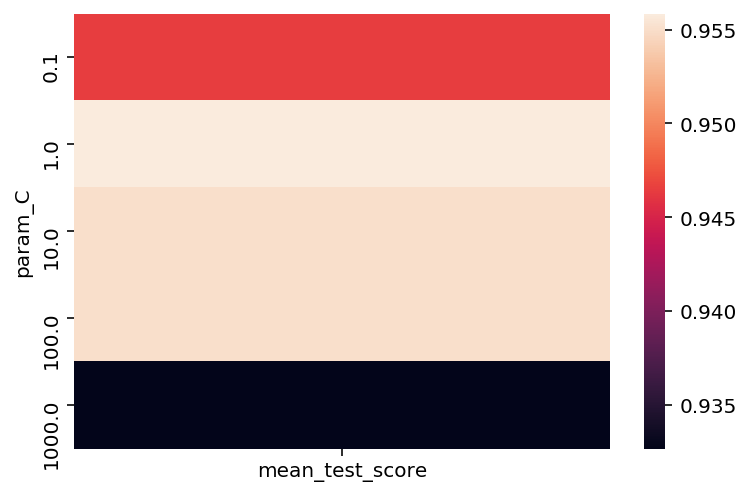

In [9]:
# SVM, trial 3, partion 80/20
pvt_forest = pd.pivot_table(pd.DataFrame(svm_cross_val_results),
    values='mean_test_score', index='param_C')
sns.heatmap(pvt_forest)
print("Best parameter, C: {}".format(C))

#### k-NN

Best parameter, n neighbors (k): 9


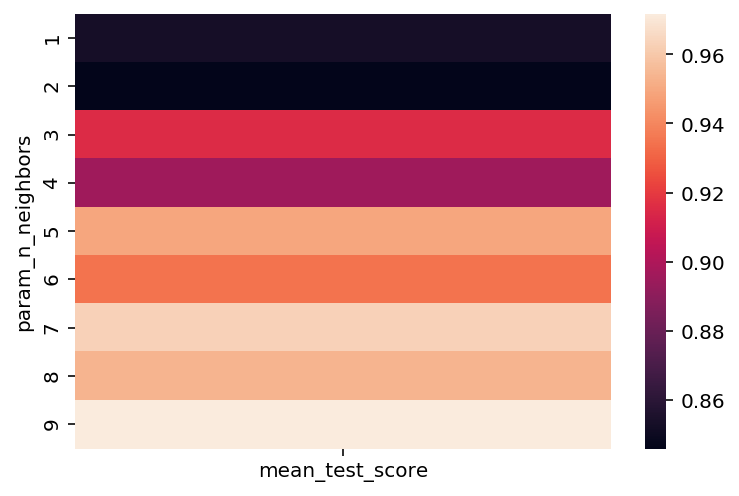

In [10]:
# k-NN, trial 3, partion 80/20
pvt_forest = pd.pivot_table(pd.DataFrame(knn_cross_val_results),
    values='mean_test_score', index='param_n_neighbors')
sns.heatmap(pvt_forest)
print("Best parameter, n neighbors (k): {}".format(k))


#### Random forest

Best parameter, n_estimators: 50
Best parameter, max_depth: 10


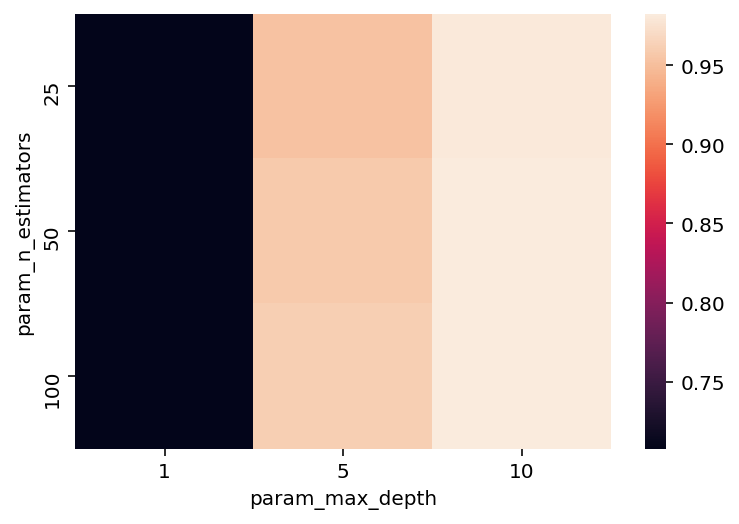

In [11]:
# Random forest, trial 3, partion 80/20
pvt_forest = pd.pivot_table(pd.DataFrame(forest_cross_val_results),
    values='mean_test_score', index='param_n_estimators', columns='param_max_depth')
sns.heatmap(pvt_forest)
print("Best parameter, n_estimators: {}".format(n))
print("Best parameter, max_depth: {}".format(d))
